In [1]:
import os 
os.chdir('../')


In [3]:
from PIL import Image 
import json 
import yaml 
import pandas as pd 

from torchvision import transforms 
from augmentation.romixgen import RoMixGen_Img,RoMixGen_Txt
from augmentation import create_romixgen
import torch 
import numpy as np 
import matplotlib.pyplot as plt 

def img_show(img):
    img = torch.permute(img,dims=(1,2,0)).detach().numpy()
    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    plt.imshow(img)
    plt.axis(False)
    plt.show()

In [4]:
config             = yaml.load(open('./configs/Retrieval_coco_small_romix.yaml'),Loader=yaml.Loader)
romixgen = create_romixgen(config)

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/transforms.py:891: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


In [12]:
obj_id = romixgen.obj_bg_dict["obj"][54]
bg_id = romixgen.obj_bg_dict["bg"][2]
print(f"obj의 수 = {len(romixgen.obj_bg_dict['obj'])}, \n bg의 수 = {len(romixgen.obj_bg_dict['bg'])}" )

obj의 수 = 42849, 
 bg의 수 = 2063


In [13]:
temp_ann = {'image_id':"coco_"+obj_id }
image_result, caption_result = romixgen(temp_ann)

/usr/local/lib/python3.8/dist-packages/transformers/generation_utils.py:1839: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  next_indices = next_tokens // vocab_size


In [45]:

obj_cat = txt_func.image_caption[obj_id]["max_obj_cat"] + txt_func.image_caption[obj_id]["max_obj_super_cat"]
bg_cat = txt_func.image_caption[bg_id]["max_obj_cat"] + txt_func.image_caption[bg_id]["max_obj_super_cat"]
#obj_caption = random.choice(self.image_caption[obj_id]["captions"])
bg_caption = np.random.choice(txt_func.image_caption[bg_id]["captions"])

new_caption = txt_func.replace_word(bg_caption, bg_cat, obj_cat)

In [55]:
image_dict[bg_id]

{'file_name': 'COCO_train2014_000000133200.jpg',
 'width': 640,
 'height': 368,
 'objects_count': 17,
 'max_obj_id': 592180,
 'max_obj_cat_id': 24,
 'max_obj_super_cat': ['animal', 'animals'],
 'max_obj_cat': ['zebra', 'zebras'],
 'max_obj_area': 1010.3388500000002,
 'max_obj_midpoint': [493.05, 220.745],
 'max_obj_bbox': [471.54, 200.16, 43.02, 41.17],
 'max_obj_area_portion': 0.004289821883491848,
 'captions': ['a bunch of animals that are standing in a field',
  'A herd of animals standing on a grassy plain.',
  'A bunch of different wild animals in a grassy field. ',
  'There are zebras and many other animals standing in the grass.',
  'A herd of zebra and cattle in a grassy area next to mountains.'],
 'obj_bg': 'bg'}

n A high mountain of snow with a cross country skier.


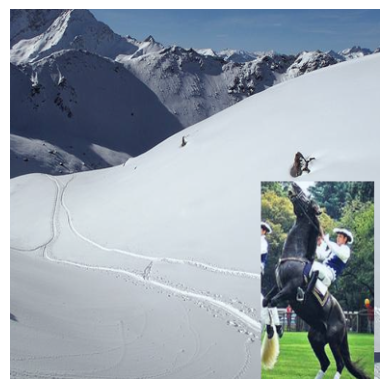

In [104]:
#obj_id = obj_bg_dict['obj'][49]
#bg_id = obj_bg_dict['bg'][382]
obj_id = '49'
bg_id = '382'
img = img_func(obj_id,bg_id)
txt = txt_func(obj_id,bg_id)
print(txt)
img_show(img)

A group of people walking on a road under large buildings.


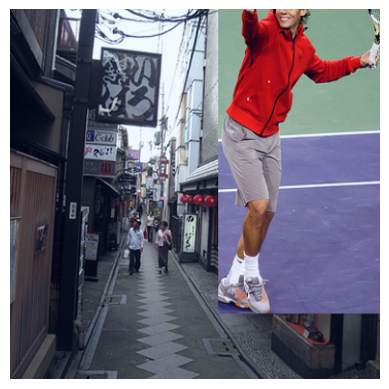

In [14]:
print(caption_result)
img_show(image_result)

In [15]:
romixgen.image_info_dict[obj_id]

{'file_name': 'COCO_val2014_000000063595.jpg',
 'width': 640,
 'height': 427,
 'max_obj_super_cat': ['person', 'people'],
 'max_obj_cat': ['person', 'people'],
 'max_obj_area': 18363.9063,
 'max_obj_midpoint': [359.35, 237.49],
 'max_obj_bbox': [277.31, 82.52, 164.08, 309.94],
 'max_obj_area_portion': 0.06719813487997657,
 'captions': ['A tennis player in a red shirt is serving the ball.',
  'Man serving tennis ball and racket with camera watching on court',
  'A man holding his tennis racket in one hand about to hit a ball.',
  'Male tennis player throws tennis ball up to serve it.',
  'A tennis player in action on the court.'],
 'obj_bg': 'obj'}